# Scraping Data

## Scraping outfield Players (Attackers, Midfielders, Defenders)

2024-05-15 15:20:06.736 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


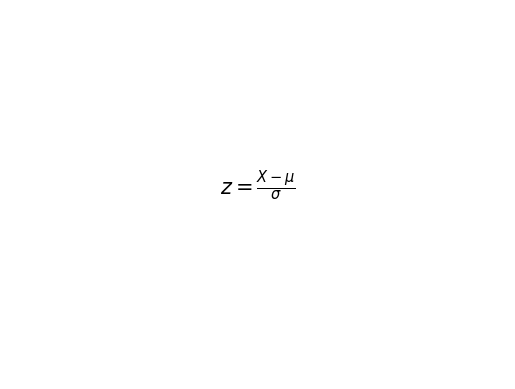

In [ ]:
import streamlit as st
import matplotlib.pyplot as plt

In [ ]:
# assigning variable for main page url
url = "https://fbref.com/en/comps/8/Champions-League-Stats"

In [ ]:
#list of years we want to scrape
years = list(range(2024, 2017, -1))

In [ ]:
years

[2024, 2023, 2022, 2021, 2020, 2019, 2018]

In [ ]:
from bs4 import BeautifulSoup
import requests

# Pulling desired links using BeautifulSoup

data = requests.get(url)
soup = BeautifulSoup(data.text)

cat_section = soup.select("div.section_content")
links = [l.get("href") for l in cat_section[0].find_all('a')]
links = [l for l in links if '/players/' in l and '/keepers' not in l and '/stats/' not in l and '/playingtime/' not in l and  '/passing_types/' not in l]
cat_urls = [f"https://fbref.com{l}" for l in links]

In [ ]:
cat_urls

[]

In [ ]:
soup.select("a.prev")[0].get("href")

'/en/comps/8/2022-2023/2022-2023-Champions-League-Stats'

In [ ]:
import pandas as pd
import time
from functools import reduce
from bs4 import BeautifulSoup
import requests
# tables will contain stats for each category in a season
tables = []

# will contains merged tables for each season
seasonal = []

for year in years:

  # Pulling desired links using BeautifulSoup

  data = requests.get(url)
  soup = BeautifulSoup(data.text)

  cat_section = soup.select("div.section_content")
  links = [l.get("href") for l in cat_section[0].find_all('a')]
  links = [l for l in links if '/players/' in l and '/keepers' not in l and '/stats/' not in l and '/playingtime/' not in l and  '/passing_types/' not in l]
  cat_urls = [f"https://fbref.com{l}" for l in links]

  for i in cat_urls:
    stat = pd.read_html(i)[0]
    tables.append(stat)
    time.sleep(1)

  for t in tables:
    # creating a data with the same headers but without multi indexing
    t.columns = [' '.join(col).strip() for col in t.columns]
    t = t.reset_index(drop=True)

  for t in tables:
    # creating a list with new names
    new_columns = []
    for col in t.columns:
      if 'level_0' in col:
        new_col = col.split()[-1]  # takes the last name
      else:
        new_col = col
      new_columns.append(new_col)

    # rename columns
    t.columns = new_columns

  for i in tables:
    i['Age'] = i['Age'].str[:2]
    i['Nation'] = i['Nation'].str.split(' ').str.get(1)
    i['Comp'] = i['Comp'].str.split(' ').str[1:].str.join(' ')
    i.drop(['Rk', 'Matches', 'Age', 'Born'], axis = 1, inplace = True)
    i.drop_duplicates(keep=False, inplace = True)
    i = i.fillna(0, inplace=True)

  # merging all dataframes in table and appending it into a new table, seasonal.
  seasonal.append(reduce(lambda left, right:
              pd.merge(left, right, on = ['90s', 'Pos', 'Squad', 'Player', 'Nation', 'Comp']),
              tables))
  #resetting for next batch of tables
  tables = []

  #getting url for previous season
  previous_season = soup.select("a.prev")[0].get("href")
  url = f"https://fbref.com{previous_season}"

TypeError: reduce() of empty iterable with no initial value

In [ ]:
  x = list(range(0,7,+1))

  for i in x:
    try:
      seasonal[i]['Season']=years[i]
    except ValueError:
      continue

In [ ]:
seasonal[6]

In [ ]:
seasonal[0].to_csv("test.csv")

In [ ]:
df = pd.concat(seasonal)
df

In [ ]:
df.to_csv("FBREF Data.csv")

## Scraping Goalkeepers

In [ ]:
from bs4 import BeautifulSoup
import requests

# Pulling desired links using BeautifulSoup

data = requests.get(url)
soup = BeautifulSoup(data.text)

cat_section = soup.select("div.section_content")
links = [l.get("href") for l in cat_section[0].find_all('a')]
links = [l for l in links if '/players/' in l and '/keepers' in l]
cat_urls = [f"https://fbref.com{l}" for l in links]

In [ ]:
cat_urls

In [ ]:
import pandas as pd
import time
from functools import reduce
from bs4 import BeautifulSoup
import requests
# tables will contain stats for each category in a season
tables = []

# will contains merged tables for each season
seasonal_goalkeepers = []

for year in years:

  # Pulling desired links using BeautifulSoup

  data = requests.get(url)
  soup = BeautifulSoup(data.text)

  cat_section = soup.select("div.section_content")
  links = [l.get("href") for l in cat_section[0].find_all('a')]
  links = [l for l in links if '/players/' in l and '/keepers' in l]
  cat_urls = [f"https://fbref.com{l}" for l in links]

  for i in cat_urls:
    stat = pd.read_html(i)[0]
    tables.append(stat)
    time.sleep(1)

  for t in tables:
    # creating a data with the same headers but without multi indexing
    t.columns = [' '.join(col).strip() for col in t.columns]
    t = t.reset_index(drop=True)

  for t in tables:
    # creating a list with new names
    new_columns = []
    for col in t.columns:
      if 'level_0' in col:
        new_col = col.split()[-1]  # takes the last name
      else:
        new_col = col
      new_columns.append(new_col)

    # rename columns
    t.columns = new_columns

  for i in tables:
    i['Age'] = i['Age'].str[:2]
    i['Nation'] = i['Nation'].str.split(' ').str.get(1)
    i['Comp'] = i['Comp'].str.split(' ').str[1:].str.join(' ')
    i.drop(['Rk', 'Matches', 'Age', 'Born'], axis = 1, inplace = True)
    i.drop_duplicates(keep=False, inplace = True)
    i = i.fillna(0, inplace=True)

  # merging all dataframes in table and appending it into a new table, seasonal.
  seasonal_goalkeepers.append(reduce(lambda left, right:
              pd.merge(left, right, on = ['90s', 'Pos', 'Squad', 'Player', 'Nation', 'Comp']),
              tables))
  #resetting for next batch of tables
  tables = []

  #getting url for previous season
  previous_season = soup.select("a.prev")[0].get("href")
  url = f"https://fbref.com{previous_season}"

In [ ]:
x = list(range(0,7,+1))

for i in x:
  try:
    seasonal_goalkeepers[i]['Season']=years[i]
  except ValueError:
    continue

In [ ]:
seasonal_goalkeepers[0]

In [ ]:
dfGK = pd.concat(seasonal_goalkeepers)
dfGK

In [ ]:
dfGK.to_csv("Goalkeeper Data.csv")